In [6]:
#import packages
import flopy
import numpy as np
import random
import matplotlib.pyplot as plt
import matplotlib as mp
import pandas as pd
import numpy as np
import os
import csv
import seaborn as sns
from pyDOE import *

#additional analysis tools
import flopy.utils.binaryfile as bf
from flopy.utils.sfroutputfile import SfrFile

from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
np.set_printoptions(threshold=np.inf)

moddir="C:/WRDAPP/MF2005.1_12/bin/mf2005.exe"
#modws ="C:/Users/davem/Documents/Thesis/modflow/mfoutput"
modws = "D:/mfoutput"
#modws= "D:/mfoutput/transientDrawdown"

#jupyter specific--included to show plots in notebook
%matplotlib inline 

8
RangeIndex(start=0, stop=692, step=1)
Int64Index([  1,   2,   6,   7,   8,   9,  10,  11,  12,  14,
            ...
            675, 676, 677, 678, 679, 682, 684, 688, 689, 690],
           dtype='int64', length=306)


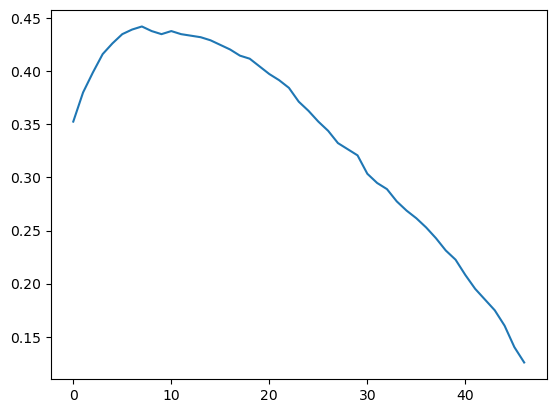

In [2]:
#Getting rid of ensembles with 0 flow at reach 25
ReachQdf = pd.read_pickle('outputs/SS_reachQ.pkl')

#ReachQdf = pd.DataFrame(ReachQ)

numgrz = [len(ReachQdf[i][ReachQdf[i] > 0].index)/len(ReachQdf.index) for i in range(50)] 
print(numgrz.index(max(numgrz)))
plt.plot(numgrz[1:48])
print(ReachQdf.index)

rn_highest = numgrz.index(max(numgrz)) #find reach with greatest number of wet ensembles 
ReachQdf = ReachQdf[ReachQdf[rn_highest] > 0]

print(ReachQdf.index)

306


C:\Users\davem\anaconda3\lib\site-packages\flopy\plot\crosssection.py:1693: MatplotlibDeprecationWarning: Passing the match_original parameter of __init__() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  patches = PatchCollection(rectcol, match_original, **kwargs)


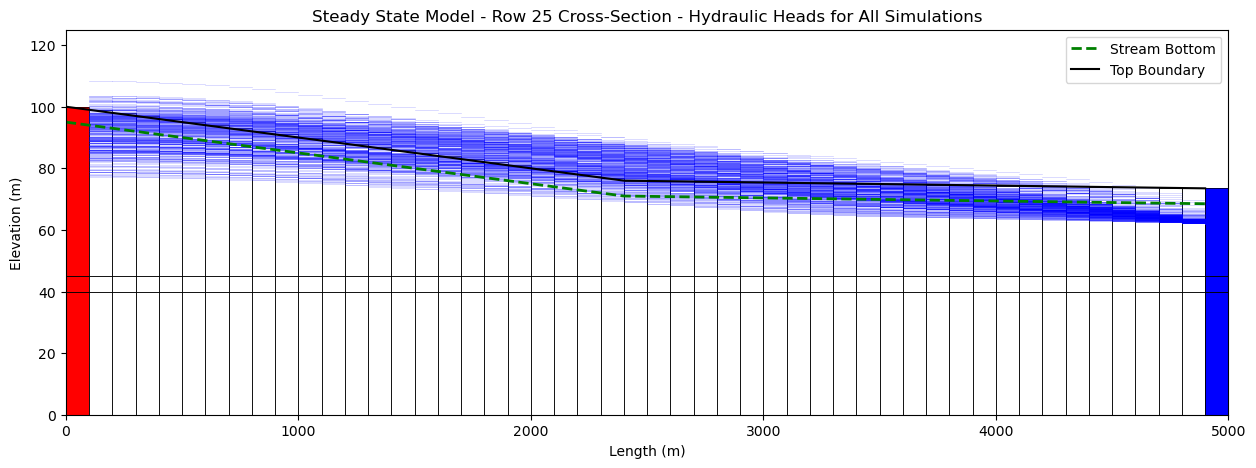

In [11]:
#temprange = np.arange(750)
#eidx = np.array(error_list)[:,0].astype(int)
#error_free = np.delete(temprange, eidx, axis=0)
mn = "D:/mfoutput/ScenarioSfrWell750_0.nam"
#mn = "D:/mfoutput/transientDrawdown/ScenarioSfr750SteadyPumpTest_0.nam"
# error_free = np.loadtxt("ModflowSfrWellOutput750Test3.txt")
# print(error_free[-1])

# outputdf = pd.read_csv('TransOutputStpSteadyPumpTest.csv') 
# outputdf = outputdf[['simnum','Qout','reach','Stp']].reset_index() #only keep the cols we need
# simlist = outputdf['simnum'].unique()
simlist = ReachQdf.index
print(len(simlist))


ztop = np.genfromtxt('base/base_model_elevs.csv', delimiter=',', dtype=float)   # top elevation of top layer (import from csv file) (dim: nrow,ncol)

reach = ztop[25] - 5
m = flopy.modflow.Modflow.load(mn)

fig = plt.figure(figsize=(15, 5))
ax = fig.add_subplot(1, 1, 1)
xsect = flopy.plot.PlotCrossSection(model=m, line={'row': 25}) #note use the key 'column' if you want to plot a column instaed
patches = xsect.plot_ibound(color_noflow='red', color_ch='blue')
#patches = xsect.plot_bc('WEL', color='red')
# linecollection = xsect.plot_grid(color='green')
# t = ax.set_title('Row 25 Cross-Section with IBOUND Boundary Conditions')
#headpc = head[0]
#pc = xsect.plot_array(headpc,head=headpc, alpha=0.5)
#patches = xsect.plot_ibound(head=head[0][0])
#patches = xsect.plot_ibound(color_noflow='red', color_ch='blue')
#patches = xsect.plot_bc('WEL', color='red')
linecollection = xsect.plot_grid(color='black', lw=0.5)
t = ax.set_title('Steady State Model - Row 25 Cross-Section - Hydraulic Heads for All Simulations')
xlabel = ax.set_xlabel('Length (m)')
ylabel = ax.set_ylabel('Elevation (m)')

#cb = plt.colorbar(pc, shrink=0.75)

#Overlay the head in a layer of the model- in this case I'm doing the top layer i.e. head3[0,:,:]

#rand_list = [int(error_free[i][-1]) for i in range(0,len(error_free))]
#rand_list = random.choice(error_free,size=250)
for i in simlist:#rand_list: #rand_list[:100]:
    modelname = "ScenarioSfrWell750Test3_"+str(i)
    #modelname = "ScenarioSfr750SteadyPumpTest_"+str(i)
    fname = modws+'/'+modelname+'.hds'
    hdobj = flopy.utils.HeadFile(fname)
    head = hdobj.get_data()
    wtup = xsect.plot_surface(head[0], lw=0.5, alpha=0.2)
  # wtlow = xsect.plot_surface(head[2], lw=0.5, alpha=0.25, color='purple')
plt.plot(np.arange(0,5000,100),reach,color='green',linestyle='dashed', lw=2, label='Stream Bottom')
plt.plot(np.arange(0,5000,100),ztop[25],color='k',linestyle='solid', lw=1.5, label='Top Boundary')

plt.legend()
